In [2]:
from sklearn.linear_model import LogisticRegression

LogisticRegression?

# Guide
- LogisticRegression 규제
    - l1: 라쏘, l2: 릿지
    - C가 작을수록 규제가 강하다.=> 단순한 모델이 된다. C는 양수 실수만 가능
    - multi_class='multinomial' 로 지정하면 다중분류로 사용가능 (softmax)
- l1 규제는 solver가 default인 **lbfgs** 는 적용이 안된다. 
    - **solver별 가능 규제**
|종류|가능규제|특징|
|-|-|-|
|'lbfgs'|['l2', None]
|'liblinear'|['l1', 'l2']
|'newton-cg'|['l2', None]
|'newton-cholesky'|['l2', None]
|'sag'|['l2', None]
|'saga'|['elasticnet', 'l1', 'l2', None]    
- Log loss
    - **앞의 것은 1일때 작용, 뒤의 것은 0일때 작용**
        - (**실제 p는 확률이 들어간다.**) y가 1이면 뒤의 것이 지워지고 0이면 앞의 것이 지워진다. 그리고 p는 확률
        - 아래 예는 극단적인 예로 p의 값을 1, 0으로 했다.
    - 맞춘 경우
        - y=1, p=0.9 : 1*-log(0.9) 이 된다. 
             - y가 1인데 p(확률)이 0.9 이면 log(0.9)가 되어 손실이 적게 나온다. (0.9이면 1로 예측했을 것이므로 맞게 예측한 것)
        - y=0, p=0.1 : (1-0)log(1-0.1) 
            - y가 0인데 p(확률)이 0.1이면 log(0.9)이므로 손실이 적게 나온다. (0.1이면 1로 예측한 것이므로 맞게 예측한 것)

    - 틀린경우
        - y=1, p=0.1 : 1*-log(0.1) 
            - y가 1인데 p가 0.1이면 log(0.1)이므로 손실이 크게 나온다. (p가 0.1이면 0으로 예측한 것이므로 틀린 것) 
        - y=0, p=0.9 : (1-0)log(1-0.9) 
            - y가 0인데 p가 0.9이면 log(0.1)이므로 손실이 크게 나온다. (p가 0.9이면 1로 예측한 것이므로 틀린 것)    

    - log(x) 는 x가 1이면 0 0에 가까울 수록 -무한으로 간다.
    - log(x)에 -1을 곱하면 (위의 식 앞에 -) 1일때 0, 0에 가까이 가면 +무한으로 바뀌어 오차를 크게 한다.
# 참고
- spine 설정: 
    - https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=jung2381187&logNo=220408716017
    - https://yeko90.tistory.com/entry/matplotlib-%EA%B8%B0%EC%B4%88-spine-%EC%B6%95-%EC%BB%A4%EC%8A%A4%ED%84%B0%EB%A7%88%EC%9D%B4%EC%A7%95-%EB%B0%A9%EB%B2%95

# 로지스틱 회귀 (LogisticRegression)
- 선형회귀 알고리즘을 이용한 이진 분류 모델
- Sample이 특정 클래스에 속할 확률을 추정한다.    
    

## 확률 추정
- 선형회귀 처럼 입력 특성(Feature)에 가중치 합을 계산한 값을 로지스틱 함수를 적용해 확률을 계산한다.


$$
\hat{p} = \sigma \left( \mathbf{w}^{T} \cdot \mathbf{X} + \mathbf{b} \right)\\
\hat{p}:\: positive의\,확률,\quad \sigma():\:logistic\,함수,\quad \mathbf{w}:\:weight,\quad \mathbf{X}:\:input feature,\quad \mathbf{b}:\:bias
$$

### 로지스틱 함수
- 0과 1사이의 실수를 반환한다.
- S 자 형태의 결과를 내는 **시그모이드 함수(sigmoid function)** 이다.

$$
\sigma(x) = \frac{1}{1 + \mathbf{e}^{-x}}
$$

- 샘플 **x**가 양성에 속할 확률

$$
\hat{y} = \begin{cases} 0\quad\hat{p}<0.5\\1\quad\hat{p}\geqq0.5 \end{cases}
$$

##### logistic 함수 시각화

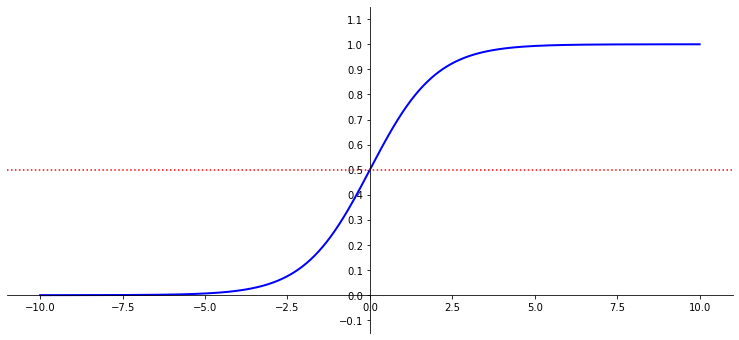

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def logistic_func(X):
    return 1 / (1 + np.exp(-X))  

X = np.linspace(-10, 10, 1000) 
y = logistic_func(X)

plt.figure(figsize=(13, 6))

plt.plot(X, y, color='b', linewidth=2)

plt.axhline(y=0.5, color='r', linestyle=':')

plt.ylim(-0.15, 1.15)
plt.yticks(np.arange(-0.1,1.2,0.1))

ax = plt.gca()
ax.spines['left'].set_position("center")
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [12]:
np.min(y), np.max(y)

(4.5397868702434395e-05, 0.9999546021312976)

## LogisticRegression의 손실 함수(Loss Function)
- **로그 손실함수(log loss)**
    - 모델이 예측한 정답의 확률에 대해 log를 취해 손실값을 구한다.
        - 확률이 틀리면 틀릴 수록 손실값을 크게 만들기 위해서 log를 취한다.


$$
\log{\left(모델이\,예측한\,정답에\,대한\,확률\right)}
$$


- **Binary Cross Entropy**
    - 2진 분류용 Log loss 함수
        - Logistic함수은 positive(1)의 확률만 추출하므로 정답이 0일때, 1일때 계산하는 것이 다르다. 그것을 하나의 공식으로 유도한 함수.
$$
L(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}\\
y:\:실제값(정답),\quad\hat{p}:\:예측확률(양성확률)
$$

- y(실제값) 이 1인 경우 $y_{i}\log{\left(\hat{p}_i\right)}$ 이 손실을 계산
- y가 0인 경우 $\left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)}$이 손실을 계산
- $\hat{p}$(예측확률)이 클수록 반환값은 작아지고 작을 수록 값이 커진다. 

> - **Loss Function**
>   - 모델이 예측한 값과 정답간의 차이(오차, loss)를 구하는 함수.
>   - 모델의 파라미터를 최적화할 때 loss를 최소화하는 것을 목적으로 한다.
> 

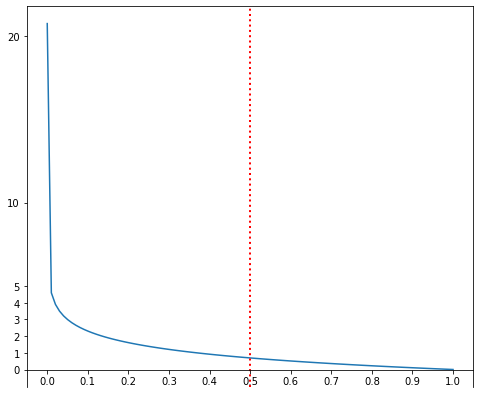

In [15]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0.000000001, 1, 100)   # 정답의 확률(X값)
y = -np.log(X)                         # 오차(log loss)

plt.figure(figsize=(8,7))
plt.plot(X, y)
plt.axvline(0.5, linestyle=':', linewidth=2, color='r')

plt.xticks(np.arange(0,1.1,0.1))
plt.yticks([0,1,2,3,4,5,10,20])
plt.gca().spines['bottom'].set_position(("data", 0))
plt.show()

## 최적화 

### 최적화란
- 모델이 예측한 결과와 정답간의 차이(오차)를 가장 적게 만드는 Parameter를 찾는 과정을 최적화라고 한다.
- 모델의 예측값과 실제 값의 차이를 계산하는 함수를 만들고 그 값이 최소가 되는 지점을 찾는 작업을 한다.

### 목적함수(Object Function), 손실함수(Loss Function), 비용함수(Cost Function), 오차함수(Error Function)
- 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.
- 이 함수의 반환값(Loss)을 최소화 하는 파라미터을 찾는 것이 최적화의 목적
- 해결하려는 문제에 맞춰 Loss 함수를 정의한다.
    - Classification(분류)의 경우 cross entropy(log loss)를 사용한다.
    - Regression(회귀)의 경우 MSE(Mean Squared Error)를 사용한다.

### LogisticRegression의 최적화
- 분류 문제이므로 Cross entropy(Log loss함수)를 손실함수로 사용한다.
- Cross entropy는 loss의 최소값으로 하는 parameter 찾는 방정식이 없기 때문에 **LogisticRegression은 경사하강법을 이용해 최적화를 진행한다.**
- 로그 손실을 $\mathbf{W}$로 미분하면 다음과 같다.
    - 아래 도함수로 기울기를 구해 기울기가 0이 될 때 까지 W(가중치)들을 update한다.
$$
\frac{\partial}{\partial w_j}L(W) = \frac{1}{m} \sum_{i=1}^{m}{\left( \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x}_i \right) - \mathbf{y}_i \right)} x_{ij}
$$

## LogisticRegression 주요 하이퍼파라미터
- penalty: 과적합을 줄이기 위한 규제방식
    - 'l1', 'l2'(기본값), 'elasticnet', 'none' 
- C: 규제강도(기본값 1) - 작을 수록 규제가 강하다(단순).
- max_iter(기본값 100) : 경사하강법 반복횟수

## 예제

##### 데이터 전처리
- LogisticRegression은 선형회귀 기반의 알고리즘이므로 연속형 Feature는 Feature scaling, 범주형 Feature는 One hot encoding 처리를 한다.

##### 모델 생성, 학습, 추론, 평가

##### GridSearchCV를 이용해 하이퍼파라미터 탐색
- C